In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def visualize(data, x, y):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    sns.stripplot(x, y, data=data, jitter=True, size=4, ax=axes[0][0])
    sns.factorplot(x=x, y=y, data=data, kind='bar', ax=axes[0][1], sharex=False, sharey=False, legend=False)
    data.boxplot(column=y, by=x, ax=axes[1][0])
    sns.violinplot(x=x, y=y, data=data, ax=axes[1][1])
    
    # Remove the extra plot that factorplot draws
    plt.close(2)
    plt.show()

In [60]:
curr_health = pd.read_csv('../2015-2016_nhanes_raw/questionnaire/current_health.csv',
                         usecols=['SEQN', 'HSD010', 'HSQ500'])

body = pd.read_csv('../2015-2016_nhanes_raw/examination/body_measures.csv', 
                   usecols=['SEQN', 'BMXBMI'])

sex_hormones = pd.read_csv('../2015-2016_nhanes_raw/laboratory/sex_steroid_hormone.csv',
                          usecols=['SEQN', 'LBXTST', 'LBXEST', 'LBXSHBG'])

biochem_profile = pd.read_csv('../2015-2016_nhanes_raw/laboratory/standard_biochem_profile.csv',
                             usecols=['SEQN', 'LBXSBU', 'LBXSC3SI', 'LBXSCA',
                                      'LBXSCH', 'LBXSCLSI', 'LBXSGL',
                                      'LBXSIR', 'LBXSKSI', 'LBXSNASI', 
                                      'LBXSTP', 'LBXSTR', 'LBXSUA'])

glycohemoglobin = pd.read_csv('../2015-2016_nhanes_raw/laboratory/glycohemoglobin.csv')

In [55]:
curr_health.HSD010.value_counts()

3.0    2493
2.0    1652
4.0    1212
1.0     606
5.0     203
Name: HSD010, dtype: int64

In [61]:
joined_a = pd.merge(curr_health, body, on='SEQN')
joined_b = pd.merge(joined_a, sex_hormones, on='SEQN')
joined_c = pd.merge(joined_b, glycohemoglobin, on='SEQN')
joined = pd.merge(joined_c, biochem_profile, on='SEQN')

In [62]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6744 entries, 0 to 6743
Data columns (total 20 columns):
SEQN        6744 non-null float64
HSD010      6166 non-null float64
HSQ500      6166 non-null float64
BMXBMI      6660 non-null float64
LBXTST      6235 non-null float64
LBXEST      6186 non-null float64
LBXSHBG     6039 non-null float64
LBXGH       6326 non-null float64
LBXSBU      6255 non-null float64
LBXSC3SI    6257 non-null float64
LBXSCA      6257 non-null float64
LBXSCH      6254 non-null float64
LBXSCLSI    6257 non-null float64
LBXSGL      6257 non-null float64
LBXSIR      6253 non-null float64
LBXSKSI     6257 non-null float64
LBXSNASI    6257 non-null float64
LBXSTP      6253 non-null float64
LBXSTR      6254 non-null float64
LBXSUA      6254 non-null float64
dtypes: float64(20)
memory usage: 1.1 MB


In [63]:
display(joined.groupby('HSD010').mean())
print('\n')
joined.groupby('HSD010').std()

,SEQN,HSQ500,BMXBMI,LBXTST,LBXEST,LBXSHBG,LBXGH,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCLSI,LBXSGL,LBXSIR,LBXSKSI,LBXSNASI,LBXSTP,LBXSTR,LBXSUA
HSD010,,,,,,,,,,,,,,,,,,,
1.0,88710.369637,1.886139,24.893167,263.812450,112.507952,66.978302,5.434116,13.721818,24.601818,9.428364,180.745455,103.425455,92.647273,85.621818,3.969491,138.854545,7.176545,119.347273,5.142182
2.0,88801.686441,1.869249,26.642150,223.719564,82.619318,65.273958,5.502519,13.949935,24.405722,9.402731,184.217165,103.332250,95.730819,84.050098,3.960286,138.704811,7.178218,128.059818,5.192653
3.0,88661.374649,1.863618,29.060940,214.741788,83.832546,61.289890,5.727740,14.072099,24.399744,9.368814,188.425886,103.384812,101.885666,80.451324,3.943844,138.754266,7.198635,152.787698,5.418454
4.0,88781.041254,1.828383,31.645379,198.223128,51.652241,54.752121,6.158930,14.916010,24.428322,9.343969,189.447552,103.042832,115.106643,76.411199,3.960734,138.472028,7.223050,167.090909,5.517133
5.0,88239.576355,1.807882,32.690206,177.002031,30.254712,56.977447,6.600510,16.321244,24.222798,9.358549,183.424870,102.927461,128.243523,68.077720,4.003109,138.336788,7.155208,184.082902,5.526425


,SEQN,HSQ500,BMXBMI,LBXTST,LBXEST,LBXSHBG,LBXGH,LBXSBU,LBXSC3SI,LBXSCA,LBXSCH,LBXSCLSI,LBXSGL,LBXSIR,LBXSKSI,LBXSNASI,LBXSTP,LBXSTR,LBXSUA
HSD010,,,,,,,,,,,,,,,,,,,
1.0,2921.705880,0.317905,5.468932,262.511543,875.589350,69.588478,0.606185,4.382121,2.027946,0.344294,40.357518,2.454854,25.048135,35.706896,0.327728,1.877080,0.415430,92.194562,1.286019
2.0,2892.087600,0.384243,6.062957,245.527168,584.904110,59.607257,0.747173,4.858783,2.092343,0.335658,41.070385,2.732634,28.495118,34.804375,0.328317,2.026818,0.447999,94.418277,1.321069
3.0,2858.380913,0.535883,6.838761,238.818596,637.868516,64.244163,1.003018,5.279989,2.140243,0.353224,42.928217,2.805465,36.670927,33.737332,0.321459,2.082635,0.462017,138.239937,1.429073
4.0,2886.627778,0.530104,8.318235,226.223420,377.005374,38.948605,1.537680,7.146940,2.340656,0.356392,46.732133,3.031030,56.166521,34.333875,0.355853,2.336351,0.465836,136.979875,1.540694
5.0,2948.933747,0.658183,8.747527,231.103193,47.327897,37.349122,1.800612,8.719017,2.772089,0.389500,44.023973,3.680597,73.410999,30.864779,0.379997,2.556761,0.538929,147.924225,1.692347


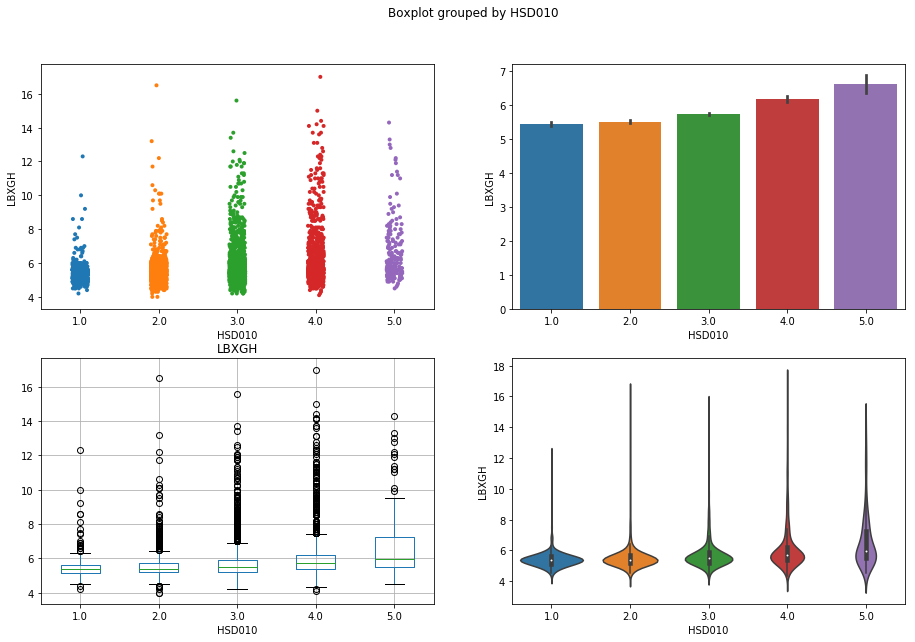

In [64]:
visualize(joined, 'HSD010', 'LBXGH')

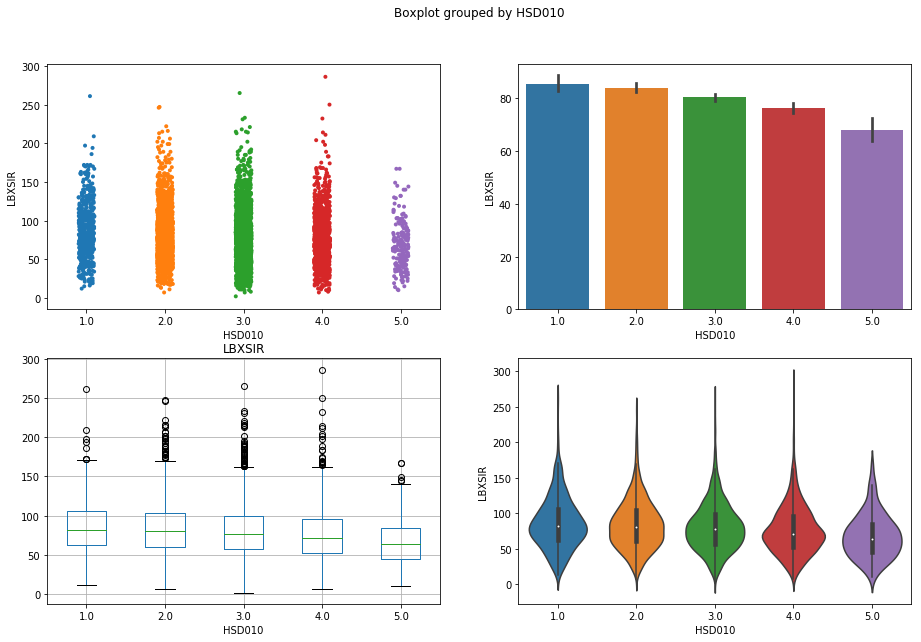

In [59]:
visualize(joined, 'HSD010', 'LBXSIR')

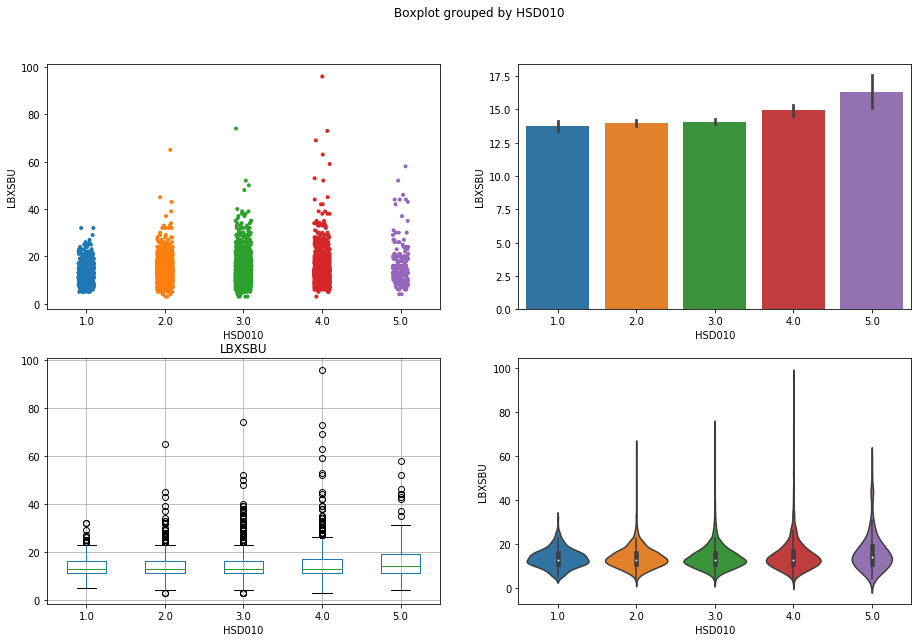

In [45]:
visualize(joined, 'HSD010', 'LBXSBU')

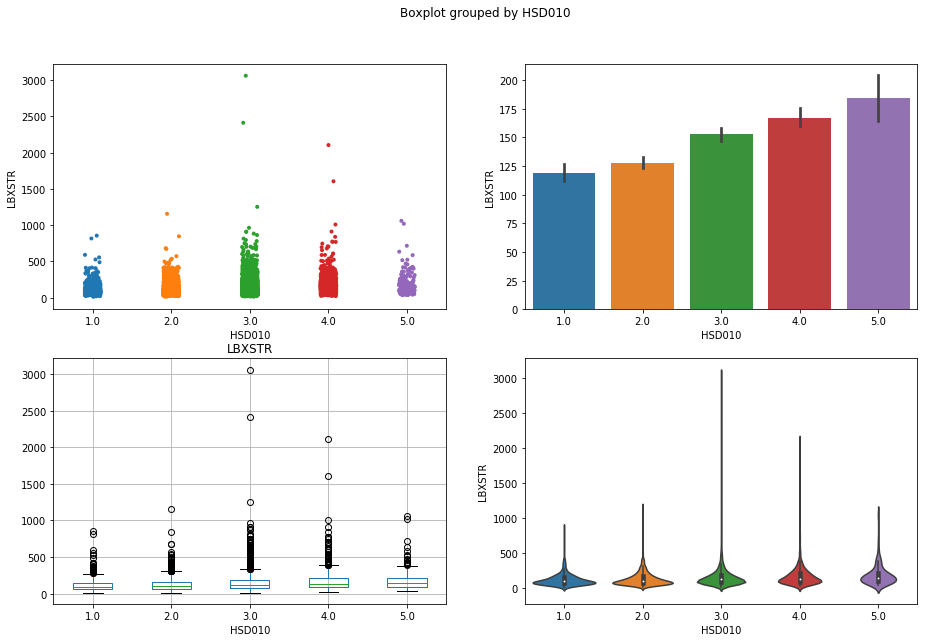

In [42]:
visualize(joined, 'HSD010', 'LBXSTR')

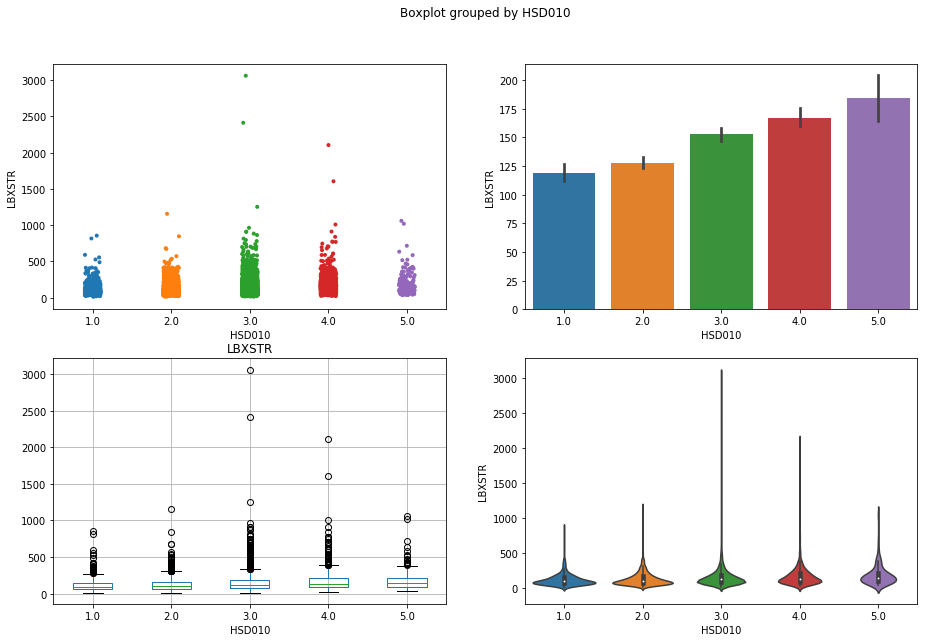

In [42]:
visualize(joined, 'HSD010', 'LBXSTR')

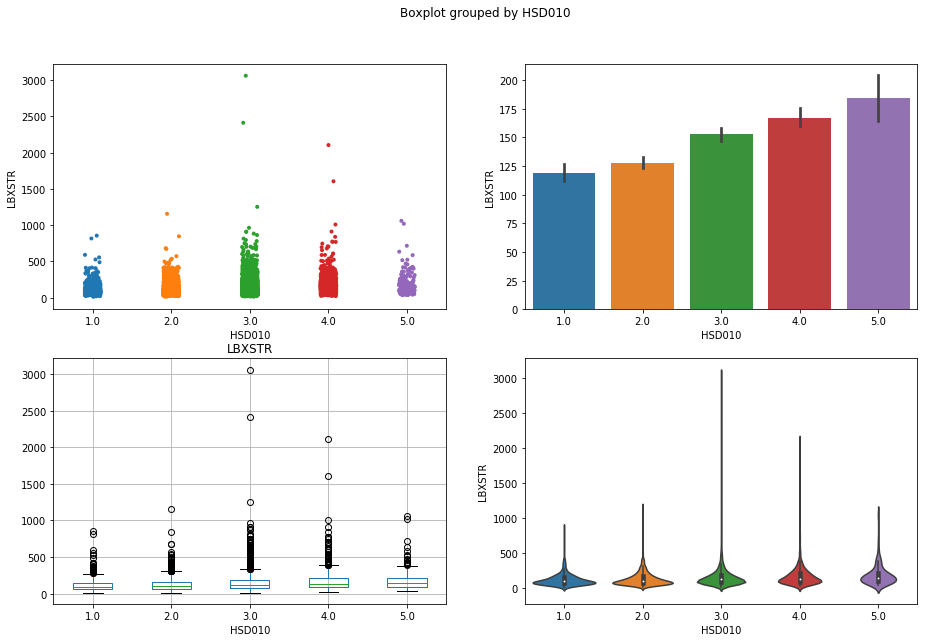

In [42]:
visualize(joined, 'HSD010', 'LBXSTR')

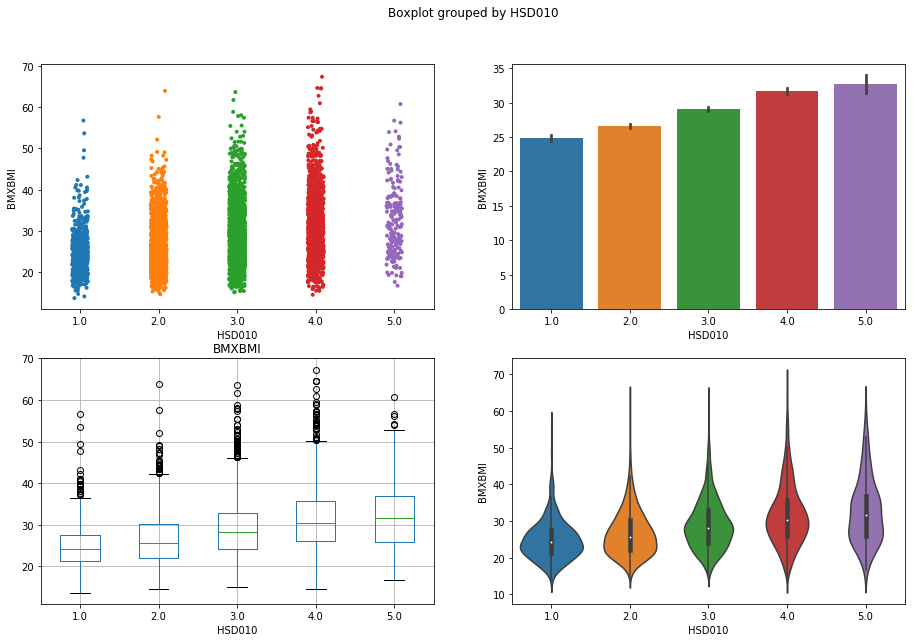

In [41]:
visualize(joined, 'HSD010', 'BMXBMI')